<a href="https://colab.research.google.com/github/shibajiray/programming-foundations-data-structures-4410875/blob/main/shibaji_EnergyWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
#importing the data CSV file in collab
from google.colab import files


uploaded = files.upload()


Saving Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv to Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv


In [3]:
# Loading the dataset CSV file
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

In [23]:
# Numeric Conversion
df['DOF Gross Floor Area'] = pd.to_numeric(df['DOF Gross Floor Area'], errors='coerce').astype(float)
df['Largest Property Use Type - Gross Floor Area (ft²)'] = pd.to_numeric(df['Largest Property Use Type - Gross Floor Area (ft²)'], errors='coerce').astype(float)
df['Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Site EUI (kBtu/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Site EUI (kBtu/ft²)'] = pd.to_numeric(df['Weather Normalized Site EUI (kBtu/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = pd.to_numeric(df['Weather Normalized Site Electricity Intensity (kWh/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = pd.to_numeric(df['Weather Normalized Site Natural Gas Intensity (therms/ft²)'], errors='coerce').astype(float)
df['Weather Normalized Source EUI (kBtu/ft²)'] = pd.to_numeric(df['Weather Normalized Source EUI (kBtu/ft²)'], errors='coerce').astype(float)
df['Electricity Use - Grid Purchase (kBtu)'] = pd.to_numeric(df['Electricity Use - Grid Purchase (kBtu)'], errors='coerce').astype(float)
df['Weather Normalized Site Electricity (kWh)'] = pd.to_numeric(df['Weather Normalized Site Electricity (kWh)'], errors='coerce').astype(float)
df['Total GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(df['Total GHG Emissions (Metric Tons CO2e)'], errors='coerce').astype(float)
df['Direct GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(df['Direct GHG Emissions (Metric Tons CO2e)'], errors='coerce').astype(float)
df['Indirect GHG Emissions (Metric Tons CO2e)'] = pd.to_numeric(df['Indirect GHG Emissions (Metric Tons CO2e)'], errors='coerce').astype(float)
df['Water Use (All Water Sources) (kgal)'] = pd.to_numeric(df['Water Use (All Water Sources) (kgal)'], errors='coerce').astype(float)
df['Water Intensity (All Water Sources) (gal/ft²)'] = pd.to_numeric(df['Water Intensity (All Water Sources) (gal/ft²)'], errors='coerce').astype(float)
df['Source EUI (kBtu/ft²)'] = pd.to_numeric(df['Source EUI (kBtu/ft²)'], errors='coerce').astype(float)

# Select relevant columns (numeric columns)
X = df.select_dtypes(include=['float64', 'int64'])
columns_to_remove = ['Order','Property Id','Latitude', 'Longitude','Community Board','Council District','Census Tract']

X = X.drop(columns=[col for col in columns_to_remove if col in X.columns], axis=1)
y = pd.to_numeric(df['ENERGY STAR Score'], errors='coerce')

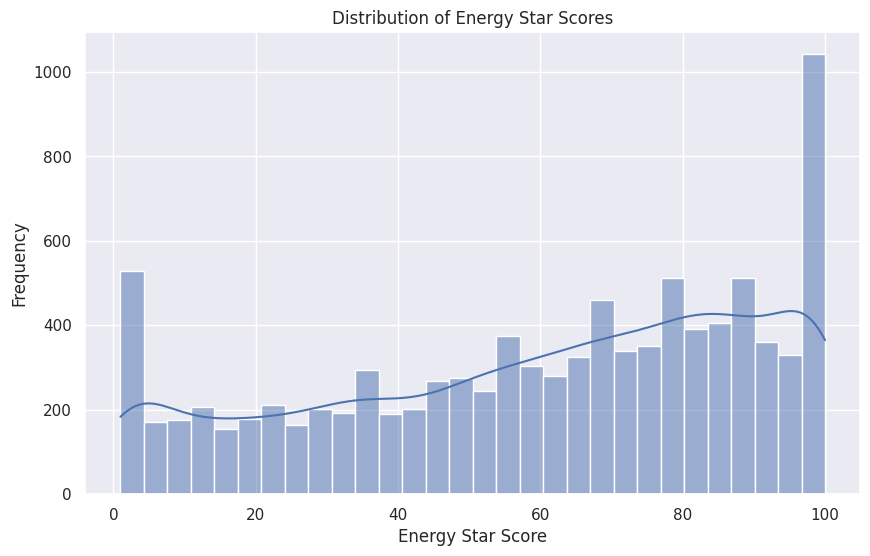

In [73]:
# Explore the distribution of Energy Star scores
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Energy Star Scores')
plt.xlabel('Energy Star Score')
plt.ylabel('Frequency')
plt.show()

In [74]:
# Calculate the correlation matrix
correlation_matrix = X.corrwith(y)

# Print the correlation values
print(correlation_matrix)


DOF Gross Floor Area                                          0.006877
Largest Property Use Type - Gross Floor Area (ft²)            0.017734
Year Built                                                   -0.118181
Number of Buildings - Self-reported                          -0.020564
Occupancy                                                    -0.031116
Site EUI (kBtu/ft²)                                          -0.036123
Weather Normalized Site EUI (kBtu/ft²)                       -0.035227
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.067762
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.023008
Weather Normalized Source EUI (kBtu/ft²)                     -0.040913
Electricity Use - Grid Purchase (kBtu)                       -0.066330
Weather Normalized Site Electricity (kWh)                    -0.065789
Total GHG Emissions (Metric Tons CO2e)                       -0.047934
Direct GHG Emissions (Metric Tons CO2e)                      -0.026355
Indire

In [9]:
X.head()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²)
0,289356.0,293447.0,1963,2,100,305.6,303.1,37.8,NaN,614.2,38139374.2,11082770.5,6962.2,0.0,6962.2,762051,NaN,NaN,619.4
1,3693539.0,3889181.0,1969,12,100,229.8,228.8,24.8,2.4,401.1,332365924.0,96261312.1,55870.4,51016.4,4854.1,3889181,NaN,NaN,404.3
2,152765.0,231342.0,1924,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,231342,NaN,NaN,NaN
3,891040.0,1305748.0,1971,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1305748,NaN,NaN,NaN
4,211400.0,179694.0,1932,1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,179694,NaN,NaN,NaN


In [54]:
y.head()

0     NaN
1    55.0
2     NaN
3     NaN
4     NaN
Name: ENERGY STAR Score, dtype: float64

In [8]:
unique_energy_star_scores = df['ENERGY STAR Score'].unique()
print(unique_energy_star_scores)

['Not Available' '55' '93' '1' '80' '72' '67' '100' '40' '99' '12' '88'
 '89' '86' '73' '71' '74' '19' '84' '78' '81' '6' '77' '3' '59' '23' '61'
 '58' '85' '66' '45' '2' '51' '17' '34' '22' '43' '13' '96' '98' '36' '69'
 '68' '65' '26' '95' '49' '39' '29' '14' '15' '16' '53' '94' '8' '33' '32'
 '91' '25' '24' '11' '21' '30' '42' '41' '79' '97' '35' '90' '28' '37'
 '31' '4' '75' '64' '9' '92' '62' '38' '76' '20' '54' '87' '70' '46' '56'
 '63' '48' '10' '60' '82' '44' '83' '52' '18' '7' '5' '27' '57' '47' '50']


In [14]:
#missing value in the IF/X
missing_values = X.isnull().sum()
print(missing_values)

DOF Gross Floor Area                                           118
Largest Property Use Type - Gross Floor Area (ft²)               2
Year Built                                                       0
Number of Buildings - Self-reported                              0
Occupancy                                                        0
Site EUI (kBtu/ft²)                                            163
Weather Normalized Site EUI (kBtu/ft²)                        1465
Weather Normalized Site Electricity Intensity (kWh/ft²)        787
Weather Normalized Site Natural Gas Intensity (therms/ft²)    1963
Weather Normalized Source EUI (kBtu/ft²)                      1465
Electricity Use - Grid Purchase (kBtu)                         244
Weather Normalized Site Electricity (kWh)                      786
Total GHG Emissions (Metric Tons CO2e)                          74
Direct GHG Emissions (Metric Tons CO2e)                         83
Indirect GHG Emissions (Metric Tons CO2e)                     

In [19]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Calling imputer function
imputer_target = SimpleImputer(strategy='mean')

In [21]:
# Impute missing values in the features
X_imputed = imputer_target.fit_transform(X.values.reshape(-1, 1)).flatten()

In [24]:
# Impute missing values in the target variable
y_imputed = imputer_target.fit_transform(y.values.reshape(-1, 1)).flatten()

In [25]:
# Convert the NumPy arrays back to pandas Series
X_imputed_series = pd.Series(X_imputed)
y_imputed_series = pd.Series(y_imputed)


In [26]:
#Both X_imputed and y_imputed have the same length
min_length = min(len(X_imputed), len(y_imputed))
X_imputed_series = pd.Series(X_imputed[:min_length])
y_imputed_series = pd.Series(y_imputed[:min_length])

In [27]:
# Check for missing values in X_imputed_series
missing_values_X = X_imputed_series.isnull().sum()
print("Missing values in X_imputed_series:", missing_values_X)

# Check for missing values in y_imputed_series
missing_values_y = y_imputed_series.isnull().sum()
print("Missing values in y_imputed_series:", missing_values_y)


Missing values in X_imputed_series: 0
Missing values in y_imputed_series: 0


In [28]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_imputed_series, y_imputed_series, test_size=0.2, random_state=42)


In [29]:
# Reshape X_train to 2D array
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

In [30]:
# Initialize the model
rf_model = RandomForestRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [31]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_reshaped, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [33]:
# Get the best model from the search
best_rf_model = grid_search.best_estimator_


In [34]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_reshaped)


In [35]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 762.3091


In [92]:
# K-Means Clustering

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files


uploaded = files.upload()


In [10]:
# Load the dataset (replace 'your_dataset.csv')
df = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')



In [11]:
# Assuming 'df' is your DataFrame and features contains the column names
features = ['ENERGY STAR Score', 'Site EUI (kBtu/ft²)', 'Total GHG Emissions (Metric Tons CO2e)']
X = df[features]


In [13]:
# Convert 'Not Available' to NaN so it can be handled by fillna
X = X.replace('Not Available', np.nan)

# Convert all columns to numeric, coercing errors will turn unconvertible values to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the median of each column, specifying numeric_only=True to address the warning
X = X.fillna(X.mean(numeric_only=True))

In [14]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Checking for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

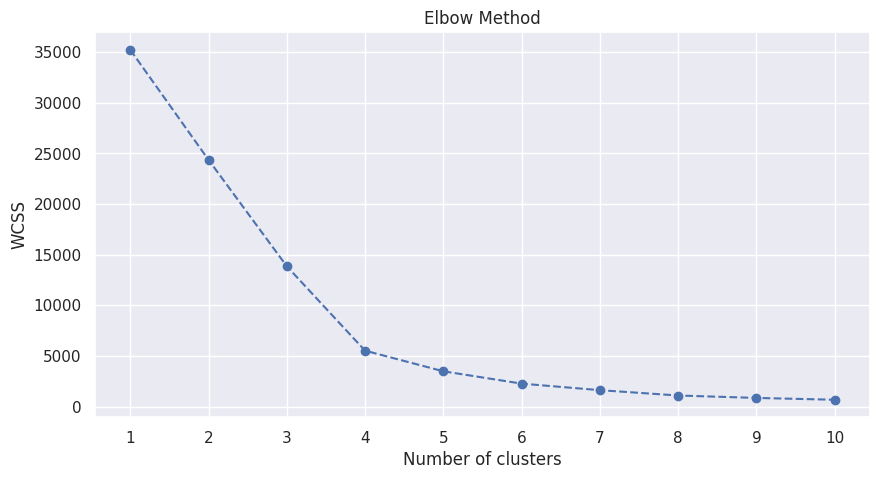

In [16]:
# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()




In [17]:
# optimal number of clusters based on the Elbow Method
optimal_k = 4

# Fit K-means model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_optimal.fit(X_scaled)

# Predict cluster labels for your data
cluster_labels = kmeans_optimal.predict(X_scaled)


In [18]:
# Assuming X_scaled is your scaled dataset and kmeans is your model
labels = kmeans.labels_
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6392034057539252
